In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("mitbih_train.csv", header = None)
test_df = pd.read_csv("mitbih_test.csv", header = None)

In [3]:
print("Total rows in training set are:",train_df.shape[0], "total column in training set are:",train_df.shape[1])
print("Total rows in testing set are:",test_df.shape[0], "total column in testing set are:",test_df.shape[1])

Total rows in training set are: 87554 total column in training set are: 188
Total rows in testing set are: 21892 total column in testing set are: 188


In [4]:
train_df[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

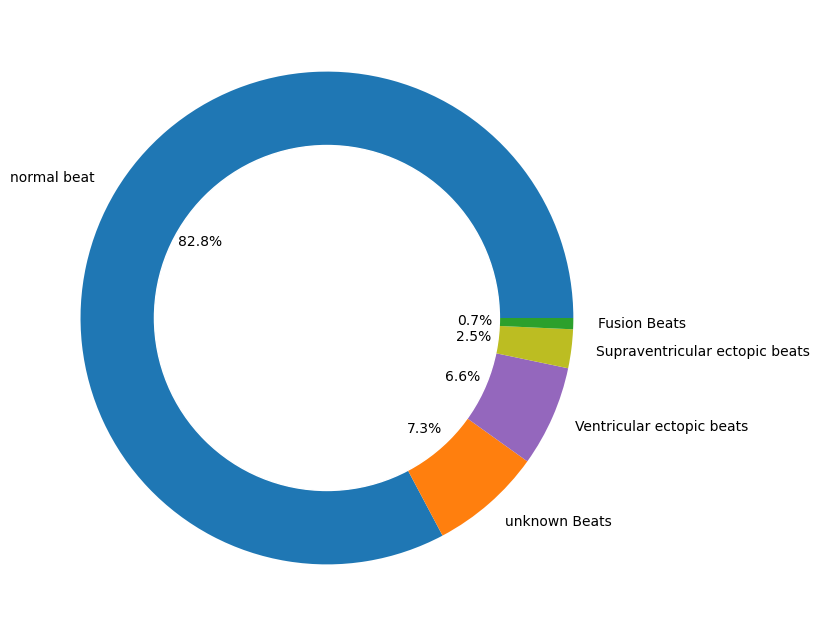

In [5]:
output = train_df[187].value_counts()
plt.figure(figsize=(8,8))
cir_plot =plt.Circle( (0,0), 0.7, color='white')
plt.pie(output, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
plt.gcf().gca().add_artist(cir_plot)
plt.show()

In [6]:
df0 = (train_df[train_df[187]==0]).sample(n=20000,random_state=0)

In [7]:
df1 = train_df[train_df[187] == 1]
df2 = train_df[train_df[187] == 2]
df3 = train_df[train_df[187] == 3]
df4 = train_df[train_df[187] == 4]

df1 = resample(df1, replace = True, n_samples = 20000, random_state = 1)
df2 = resample(df2, replace = True, n_samples = 20000, random_state = 2)
df3 = resample(df3, replace = True, n_samples = 20000, random_state = 3)
df4 = resample(df4, replace = True, n_samples = 20000, random_state = 4)

In [8]:
training_data = pd.concat([df0, df1, df2, df3, df4])

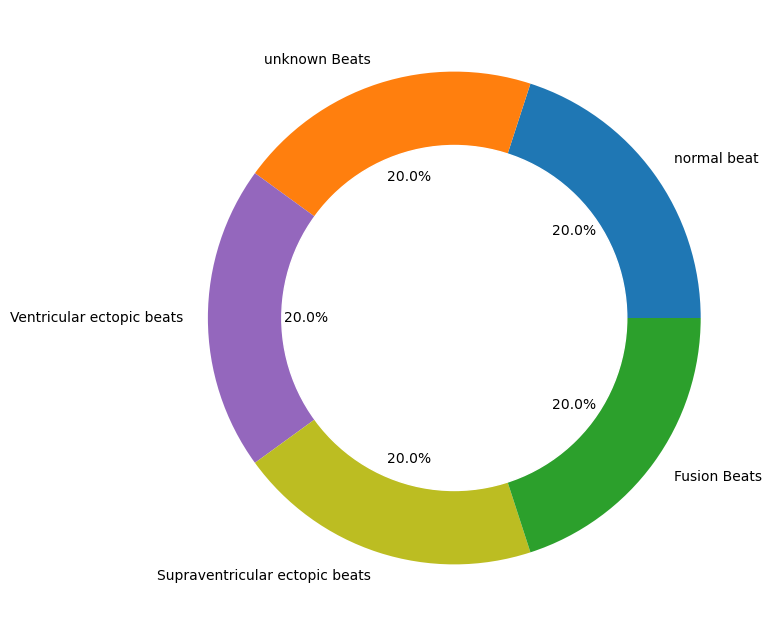

In [9]:
# representation of classes % wise
output = training_data[187].value_counts()
plt.figure(figsize=(8,8))
cir_plot=plt.Circle( (0,0), 0.7, color='white')
plt.pie(output, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(cir_plot)
plt.show()

In [10]:
op_data=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

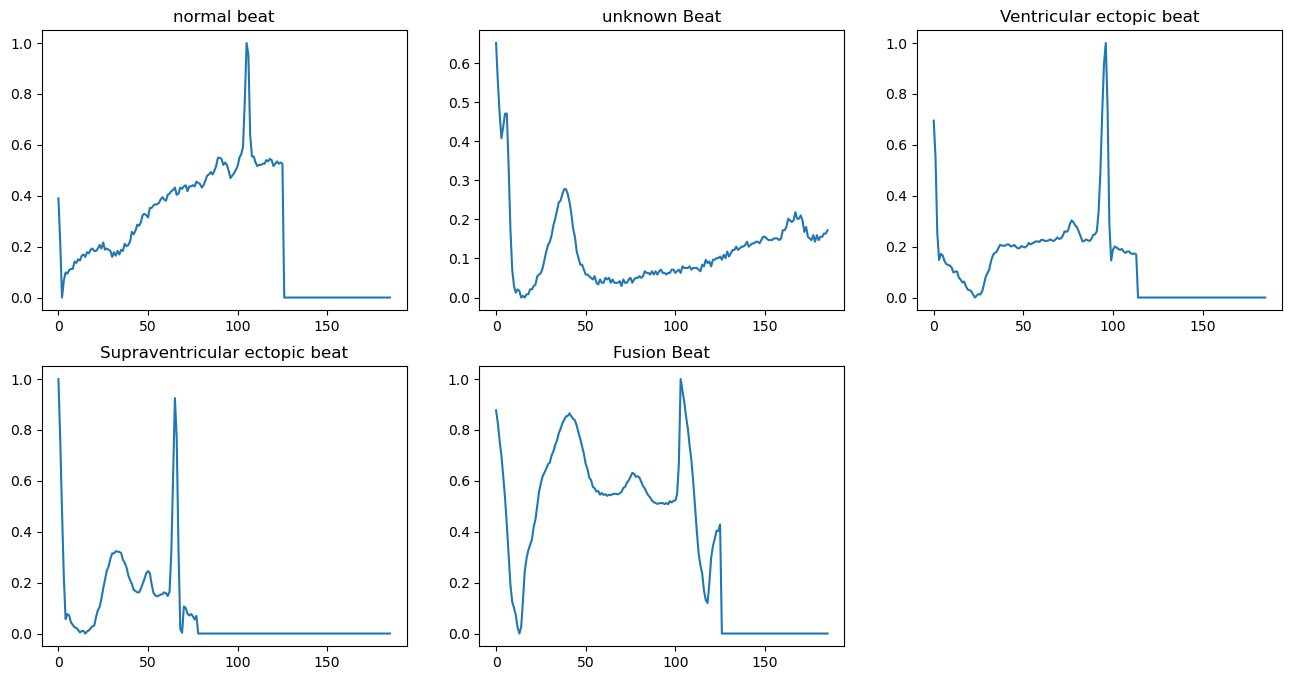

In [11]:
plt.figure(figsize=(16,8))
# class1
plt.subplot(2, 3, 1)  
plt.plot(op_data.iloc[0,:186])
plt.title('normal beat')
# # class2
plt.subplot(2, 3, 2)  
plt.plot(op_data.iloc[1,:186])
plt.title('unknown Beat')
# # class3
plt.subplot(2, 3, 3)  
plt.plot(op_data.iloc[2,:186])
plt.title('Ventricular ectopic beat')
# class4
plt.subplot(2, 3, 4)  
plt.plot(op_data.iloc[3,:186])
plt.title('Supraventricular ectopic beat')
# class5
plt.subplot(2, 3, 5)  
plt.plot(op_data.iloc[4,:186])
plt.title('Fusion Beat')
# show plot
plt.show()

In [12]:
color = ['pink','blue','yellow','red','green']
label = ["Normal","Supraventricular","Ventricular", "Fusion","Unknown"]

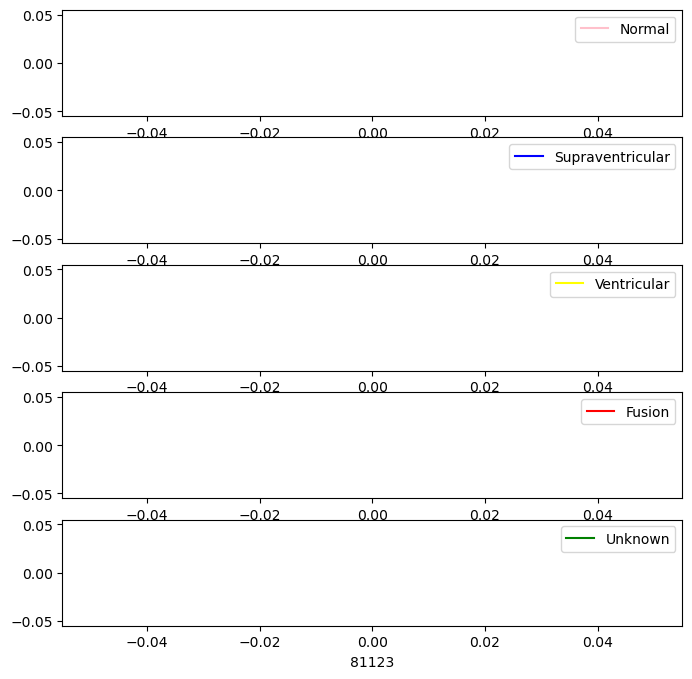

In [13]:
fig, ax = plt.subplots(5, figsize=(8, 8))

t = sns.lineplot((train_df[train_df[187] == 0].iloc[0])[:-1], label=label[0], color=color[0], ax=ax[0])
t = sns.lineplot((train_df[train_df[187] == 1].iloc[0])[:-1], label=label[1], color=color[1], ax=ax[1])
t = sns.lineplot((train_df[train_df[187] == 2].iloc[0])[:-1], label=label[2], color=color[2], ax=ax[2])
t = sns.lineplot((train_df[train_df[187] == 3].iloc[0])[:-1], label=label[3], color=color[3], ax=ax[3])
t = sns.lineplot((train_df[train_df[187] == 4].iloc[0])[:-1], label=label[4], color=color[4], ax=ax[4])

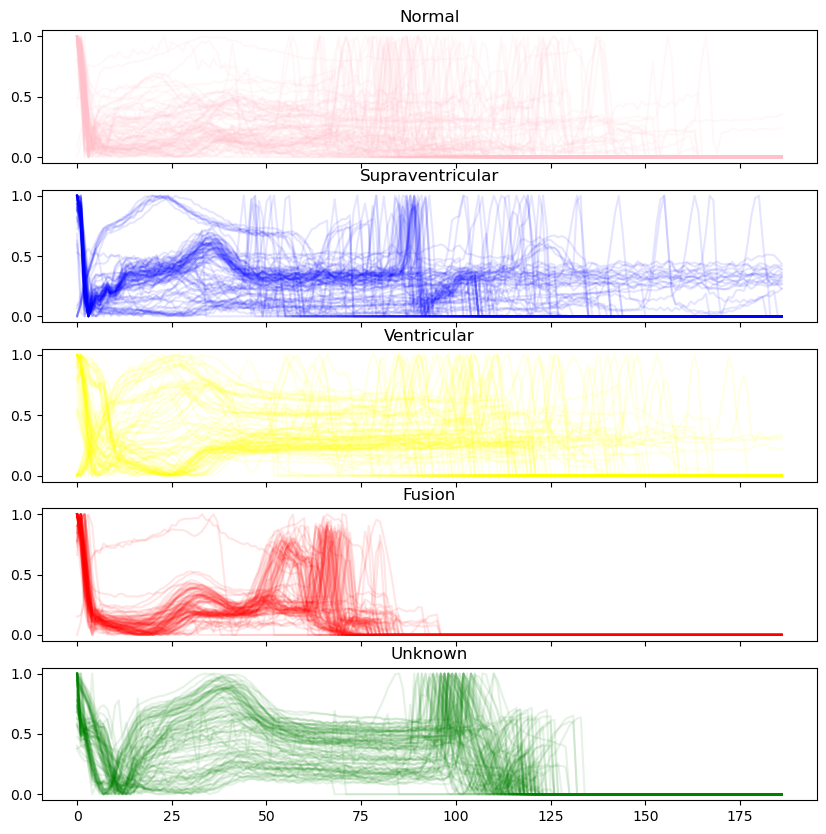

In [14]:
fig, ax = plt.subplots(5,  sharex=True, sharey=True,figsize=(10,10))
for j in range(5):
    for i in range(100):
        t = ax[j].plot((train_df[train_df[187] == j].iloc[i])[:-1], color=color[j], alpha = 0.1)
    ax[j].title.set_text(label[j]) 

## Divide the trainingsdata into trainins and validationdata that have the sae distribution of classes.



In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(training_data, training_data[187]):
    X = training_data.iloc[train_index]
    X_valid = training_data.iloc[valid_index]

In [17]:
X[187].value_counts() / len(X)

4.0    0.2
3.0    0.2
0.0    0.2
1.0    0.2
2.0    0.2
Name: 187, dtype: float64

In [18]:
X_valid[187].value_counts() / len(X_valid)

3.0    0.2
0.0    0.2
2.0    0.2
1.0    0.2
4.0    0.2
Name: 187, dtype: float64

In [19]:
y = X[187]
y_valid = X_valid[187]
X.pop(187)
X_valid.pop(187)

81103    3.0
80977    3.0
50167    0.0
80500    3.0
33600    0.0
        ... 
85009    4.0
64784    0.0
18349    0.0
15104    0.0
78509    2.0
Name: 187, Length: 20000, dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X_valid = scaler.transform(X_valid)
X_valid = pd.DataFrame(X_valid)

In [23]:
from tensorflow import keras
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint

In [24]:
model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(32,kernel_initializer="he_normal",activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

In [25]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 187)               0         
                                                                 
 dense (Dense)               (None, 32)                6016      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [27]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])
callbacks = ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)
history=model.fit(X, y, epochs=20,validation_data=(X_valid,y_valid),callbacks = callbacks, batch_size=32)

Epoch 1/20
2500/2500 [==============================] - 17s 5ms/step - loss: 0.9956 - accuracy: 0.6120 - val_loss: 0.6089 - val_accuracy: 0.7910
Epoch 2/20
2500/2500 [==============================] - 13s 5ms/step - loss: 0.7210 - accuracy: 0.7494 - val_loss: 0.4709 - val_accuracy: 0.8361
Epoch 3/20
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6205 - accuracy: 0.7871 - val_loss: 0.3839 - val_accuracy: 0.8642
Epoch 4/20
2500/2500 [==============================] - 14s 5ms/step - loss: 0.5571 - accuracy: 0.8130 - val_loss: 0.3402 - val_accuracy: 0.8830
Epoch 5/20
2500/2500 [==============================] - 13s 5ms/step - loss: 0.5137 - accuracy: 0.8314 - val_loss: 0.3134 - val_accuracy: 0.8923
Epoch 6/20
2500/2500 [==============================] - 13s 5ms/step - loss: 0.4870 - accuracy: 0.8422 - val_loss: 0.2894 - val_accuracy: 0.9033
Epoch 7/20
2500/2500 [==============================] - 13s 5ms/step - loss: 0.4610 - accuracy: 0.8526 - val_loss: 0.2881 - val_ac

In [28]:
predictions = model.predict(X_valid)
predictions=np.argmax(predictions, axis=1)

625/625 [==============================] - 2s 2ms/step


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      4000
         1.0       0.95      0.91      0.93      4000
         2.0       0.96      0.94      0.95      4000
         3.0       0.94      0.98      0.96      4000
         4.0       0.99      0.98      0.98      4000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [30]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    

Accuracy: 94.35%


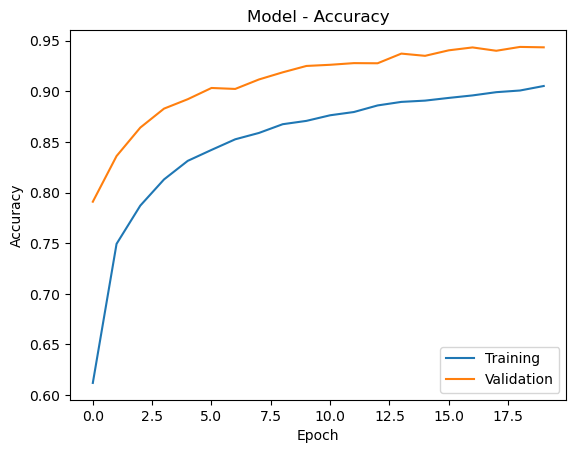

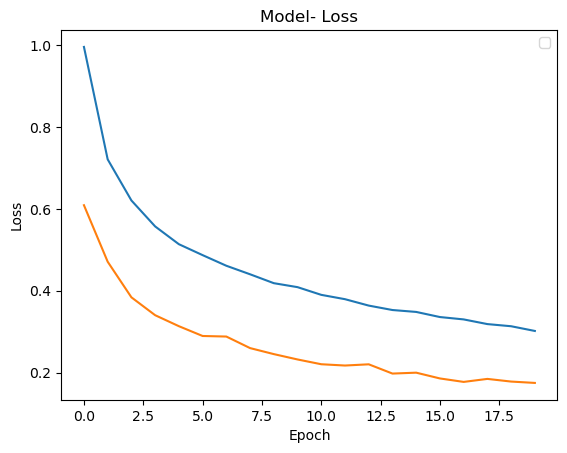

In [31]:
evaluate_model(history,X_valid,y_valid,model)

# Prediction on testing data

In [32]:
test_y = test_df[187]
test_x = test_df.iloc[:,:187]

In [33]:
X_test = scaler.fit_transform(test_x)
X_test = pd.DataFrame(X_test)


In [34]:
predictions = model.predict(X_test)
predictions=np.argmax(predictions, axis=1)

685/685 [==============================] - 2s 2ms/step


In [35]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     18118
         1.0       0.37      0.76      0.50       556
         2.0       0.63      0.93      0.75      1448
         3.0       0.16      0.89      0.27       162
         4.0       0.88      0.96      0.92      1608

    accuracy                           0.88     21892
   macro avg       0.61      0.88      0.67     21892
weighted avg       0.94      0.88      0.90     21892

